In [1]:
import pandas as pd
import os

main_folder = '/Volumes/G Drive/enertalk/00'

# Create a dictionary to store the appliance data
appliance_data = {}

# Iterate over subfolders in the main folder
for subfolder in os.listdir(main_folder):
    if subfolder == '.DS_Store':
        continue

    subfolder_path = os.path.join(main_folder, subfolder)

    if not os.path.isdir(subfolder_path):
        continue

    try:
        # Load the washing machine data
        washing_machine_files = [file for file in os.listdir(subfolder_path) if 'washing-machine' in file and file.endswith('.parquet.gzip')]
        for file in washing_machine_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            washing_machine_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = washing_machine_data

        # Load the rice cooker data
        rice_cooker_files = [file for file in os.listdir(subfolder_path) if 'rice-cooker' in file and file.endswith('.parquet.gzip')]
        for file in rice_cooker_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            rice_cooker_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = rice_cooker_data

        # Load the total data
        total_files = [file for file in os.listdir(subfolder_path) if 'total' in file and file.endswith('.parquet.gzip')]
        for file in total_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            total_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = total_data

        # Load the TV data
        tv_files = [file for file in os.listdir(subfolder_path) if 'TV' in file and file.endswith('.parquet.gzip')]
        for file in tv_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            tv_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = tv_data

        # Load the microwave data
        microwave_files = [file for file in os.listdir(subfolder_path) if 'microwave' in file and file.endswith('.parquet.gzip')]
        for file in microwave_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            microwave_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = microwave_data

        # Load the water purifier data
        water_pur_files = [file for file in os.listdir(subfolder_path) if 'water-purifier' in file and file.endswith('.parquet.gzip')]
        for file in water_pur_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            water_pur_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = water_pur_data

        # Load the fridge data
        fridge_files = [file for file in os.listdir(subfolder_path) if 'fridge' in file and file.endswith('.parquet.gzip')]
        for file in fridge_files:
            file_path = os.path.join(subfolder_path, file)
            appliance_name = file.split('_')[1].split('.')[0]
            fridge_data = pd.read_parquet(file_path)
            appliance_data[appliance_name] = fridge_data
            
        kimchi_fridge_files = [file for file in os.listdir(subfolder_path) if 'kimchi-fridge' in file and file.endswith('.parquet.gzip')]
        for file in kimchi_fridge_files:
            kimchi_fridge_path = os.path.join(subfolder_path, file)
            kimchi_fridge_data = pd.read_parquet(kimchi_fridge_path)
            # Store the kimchi fridge data in the dictionary with the appliance name
            appliance_name = file.split('_')[1].split('.')[0]
            appliance_data[appliance_name] = kimchi_fridge_data

    except FileNotFoundError as e:
        # Handle the case when a file is not found
        print(f"Skipping folder {subfolder}: {e}")
        continue


In [2]:
# Create a list of appliance_data and appliance_names
appliance_data = [fridge_data, microwave_data, tv_data, washing_machine_data, rice_cooker_data, water_pur_data, kimchi_fridge_data]
appliance_names = ['fridge', 'microwave', 'tv', 'washing_machine', 'rice_cooker', 'water_pur', 'kimchi_fridge']

# Iterate over the appliance_data and perform the join operation
for i, appliance in enumerate(appliance_data):
    # Rename the columns of the specific appliance dataset
    appliance.columns = [appliance_names[i] + '_active_power', appliance_names[i] + '_reactive_power', 'timestamp']
    
    # Join the total_data with the specific appliance dataset on 'timestamp' column
    appliance_data[i] = total_data.merge(appliance, on='timestamp')
    appliance_data[i].rename(columns={'active_power': 'total_active_power', 'reactive_power': 'total_reactive_power'}, inplace=True)
    appliance_data[i] = appliance_data[i].dropna()
    if i == 0:
        fridge_data = appliance_data[i]
        fridge_data = fridge_data.set_index('timestamp')
    elif i == 1:
        microwave_data = appliance_data[i]
        microwave_data = microwave_data.set_index('timestamp')
    elif i == 2:
        tv_data = appliance_data[i]
        tv_data = tv_data.set_index('timestamp')
    elif i == 3:
        washing_machine_data = appliance_data[i]
        washing_machine_data = washing_machine_data.set_index('timestamp')
    elif i == 4:
        rice_cooker_data = appliance_data[i]
        rice_cooker_data = rice_cooker_data.set_index('timestamp')
    elif i == 5:
        water_pur_data = appliance_data[i]
        water_pur_data = water_pur_data.set_index('timestamp')
    elif i == 6:
        kimchi_fridge_data = appliance_data[i]
        kimchi_fridge_data = kimchi_fridge_data.set_index('timestamp')



In [3]:
kimchi_fridge_data

,total_active_power,total_reactive_power,kimchi_fridge_active_power,kimchi_fridge_reactive_power
timestamp,,,,
1.482885e+12,490.08,-165.51,0.52,-3.34
1.482885e+12,489.32,-165.41,0.67,-3.35
1.482885e+12,493.96,-166.04,0.62,-3.30
1.482885e+12,491.11,-165.96,0.59,-3.37
1.482885e+12,490.94,-166.14,0.63,-3.43
...,...,...,...,...
1.482967e+12,747.78,-89.63,0.69,-3.53
1.482967e+12,779.32,-95.42,0.52,-3.52
1.482967e+12,799.57,-97.13,0.53,-3.47


In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score



# Define the list of target columns for each appliance
target_columns = [
    ['fridge_active_power', 'fridge_reactive_power'],
    ['microwave_active_power', 'microwave_reactive_power'],
    ['tv_active_power', 'tv_reactive_power'],
    ['washing_machine_active_power', 'washing_machine_reactive_power'],
    ['rice_cooker_active_power', 'rice_cooker_reactive_power'],
    ['water_pur_active_power', 'water_pur_reactive_power'],
    ['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']
]

train_data = []
test_data = []

# Split each dataset into train and test sets
for dataset in appliance_data:
    dataset_test_size = int(0.2 * len(dataset))
    dataset_test_indx = len(dataset) - dataset_test_size
    dataset_test = dataset.iloc[dataset_test_indx:].set_index('timestamp')
    dataset_train = dataset.iloc[:dataset_test_indx].set_index('timestamp')
    
    train_data.append(dataset_train)
    test_data.append(dataset_test)

fridge_train, microwave_train, tv_train, washing_machine_train, rice_cooker_train, water_pur_train, kimchi_fridge_train = train_data
fridge_test, microwave_test, tv_test, washing_machine_test, rice_cooker_test, water_pur_test, kimchi_fridge_test = test_data


In [5]:
kimchi_fridge_train

,total_active_power,total_reactive_power,kimchi_fridge_active_power,kimchi_fridge_reactive_power
timestamp,,,,
1.482885e+12,490.08,-165.51,0.52,-3.34
1.482885e+12,489.32,-165.41,0.67,-3.35
1.482885e+12,493.96,-166.04,0.62,-3.30
1.482885e+12,491.11,-165.96,0.59,-3.37
1.482885e+12,490.94,-166.14,0.63,-3.43
...,...,...,...,...
1.482957e+12,308.60,-44.66,0.60,-3.41
1.482957e+12,309.23,-44.09,0.55,-3.57
1.482957e+12,309.66,-44.47,0.62,-3.40


In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


class CO:
    def __init__(self, num_states=2, num_cluster=2):
        self.num_states = num_states
        self.num_cluster = num_cluster
        self.models = None

    def train(self, X):
        X_agg = self.create_input(X)
        self.models = self.train_co(X_agg)
        return self.models

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def train_co(self, X):
        num_samples, num_features = X.shape
        models = []
        for k in range(num_features):
            model = KMeans(n_clusters=self.num_cluster).fit(X[:, k].reshape(-1, 1))
            models.append(model)
        return models

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for k in range(n_features):
            cluster_labels = self.models[k].predict(X_agg[:, k].reshape(-1, 1))
            cluster_centers = self.models[k].cluster_centers_
            for i, label in enumerate(cluster_labels):
                Y[i, k] = cluster_centers[label]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

    
total_features = ['total_active_power', 'total_reactive_power']
fridge_features = ['fridge_active_power', 'fridge_reactive_power']
washing_machine_features = ['washing_machine_active_power', 'washing_machine_reactive_power']
microwave_features = ['microwave_active_power', 'microwave_reactive_power']
rice_cooker_features = ['rice_cooker_active_power','rice_cooker_reactive_power']
tv_features = ['tv_active_power','tv_reactive_power']
water_pur_features = ['water_pur_active_power','water_pur_reactive_power']
kimchi_fridge_features = ['kimchi_fridge_active_power', 'kimchi_fridge_reactive_power']

X_fridge = fridge_data[total_features].values
Y_fridge = fridge_data[fridge_features].values

X_train_fridge, X_test_fridge, Y_train_fridge, Y_test_fridge = fridge_train[total_features].values, fridge_test[total_features].values, fridge_train[fridge_features].values, fridge_test[fridge_features].values

co_disaggregator_fridge = CO(num_states=2,num_cluster=2)
co_disaggregator_fridge.train(X_train_fridge)

disaggregated_data_fridge  = co_disaggregator_fridge.disaggregate(X_test_fridge)

for i, feature in enumerate(fridge_features):
    true_values = Y_test_fridge[:, i]
    pred_values = distotal_data_fridge[:, i]
    
    rmse = co_disaggregator_fridge.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_fridge.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_fridge.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()


Metrics for fridge_active_power:
RMSE: 377.01660251584127
MSE: 142141.51857258787
RMAE: 46.837765297444896
MAE: 347.73874328006474
R2: -81.68491148914235

Metrics for fridge_reactive_power:
RMSE: 124.54303833653348
MSE: 15510.96839809525
RMAE: -305.5139626968429
MAE: 105.15086301368163
R2: -37.119283331726265



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


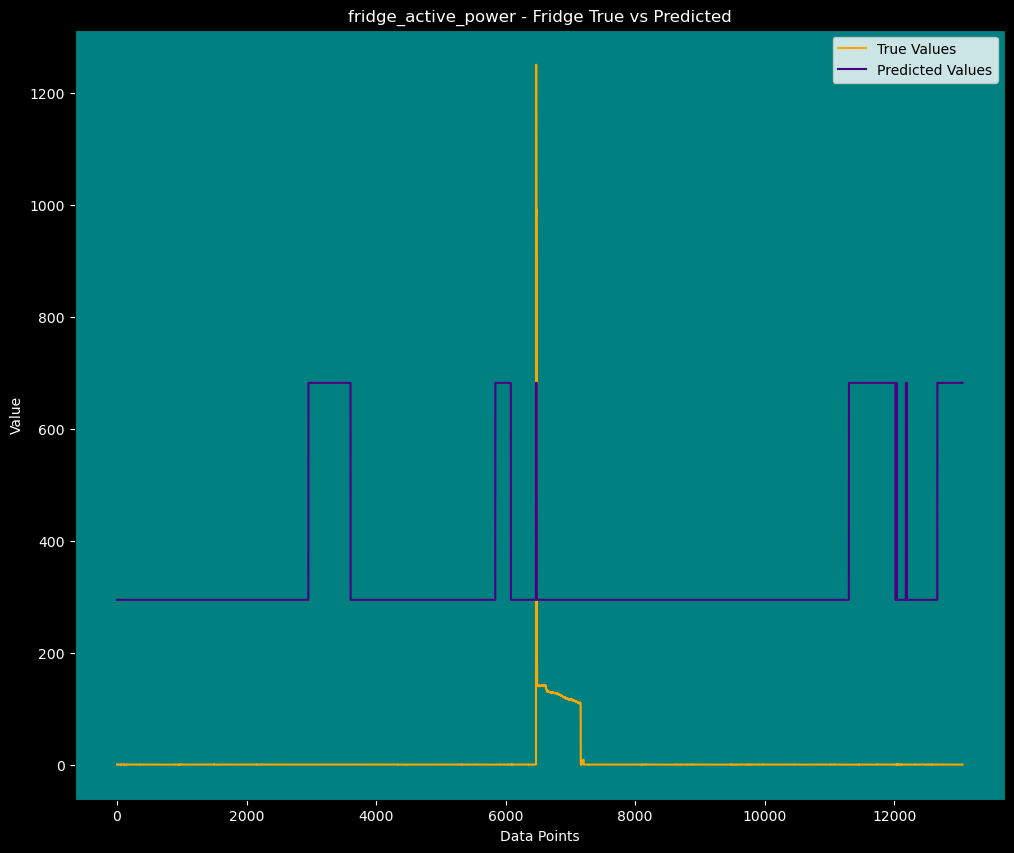

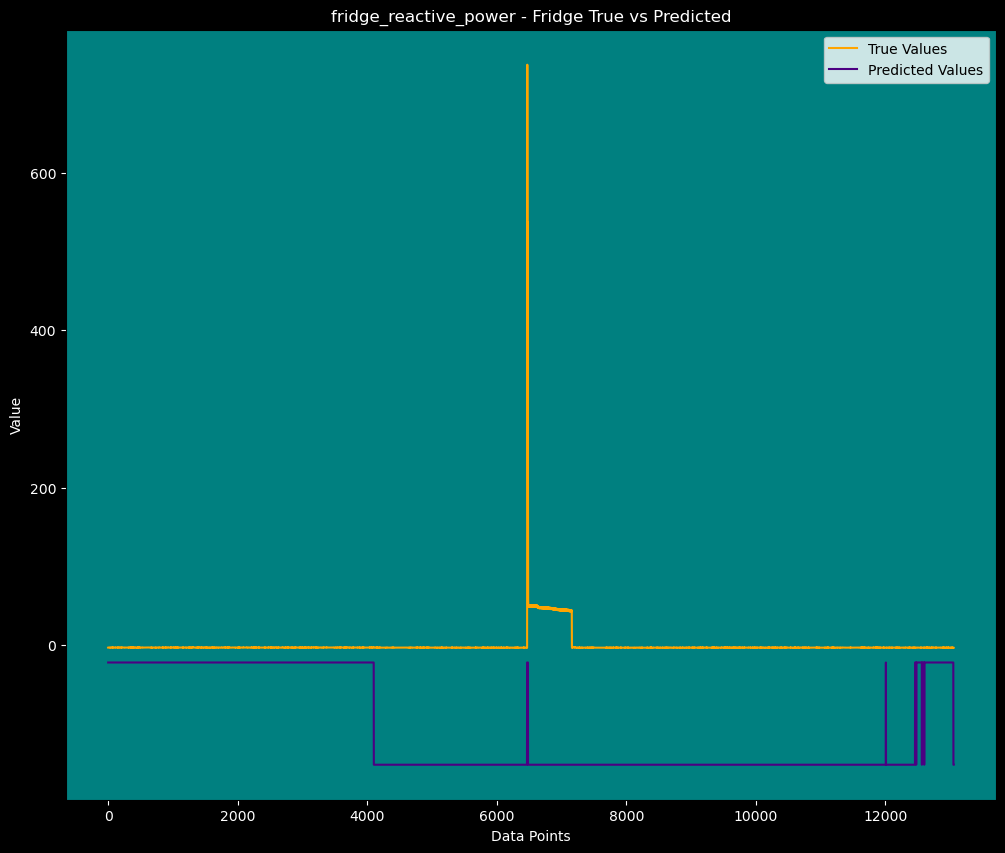

In [16]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_fridge.shape[1]):
    column_name = fridge_features[i]
    column_true = Y_test_fridge[:, i]
    column_pred = disaggregated_data_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - Fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for microwave_active_power:
RMSE: 455.07048714793837
MSE: 207089.14827306193
RMAE: 608.3452170191582
MAE: 419.50218454844213
R2: -685347.1437924461

Metrics for microwave_reactive_power:
RMSE: 111.13023370237028
MSE: 12349.928842743433
RMAE: -72.84997743395279
MAE: 95.4458608450749
R2: -1478053.3216668207



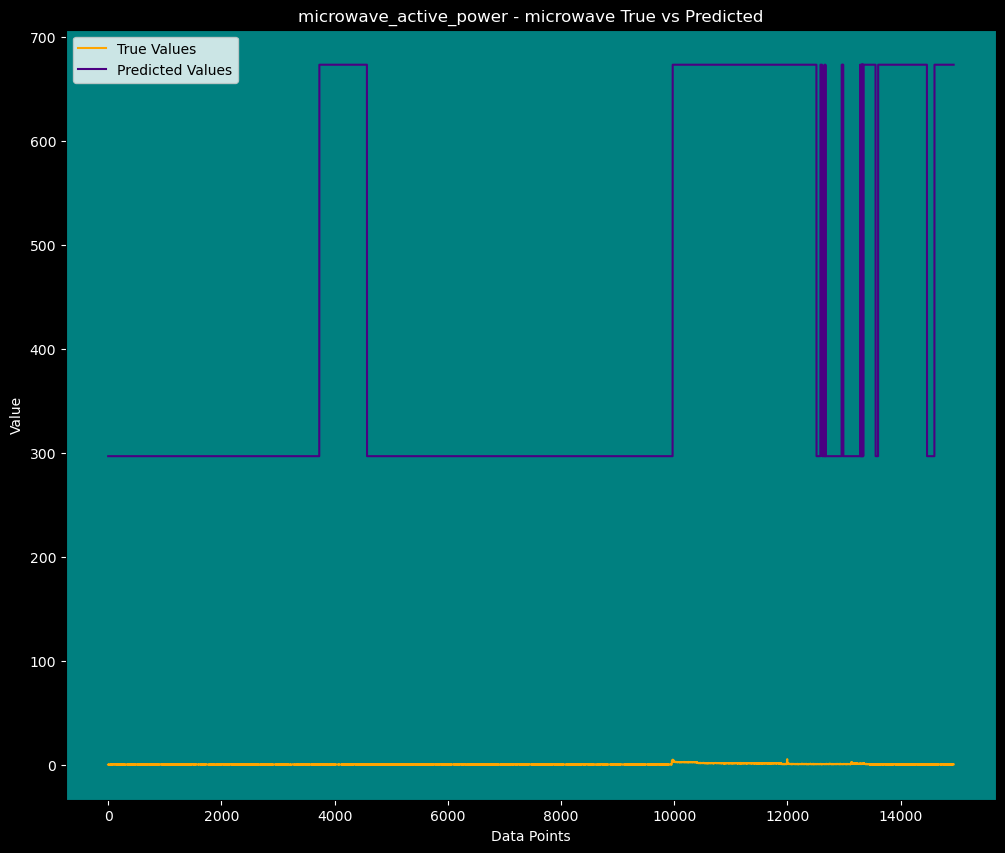

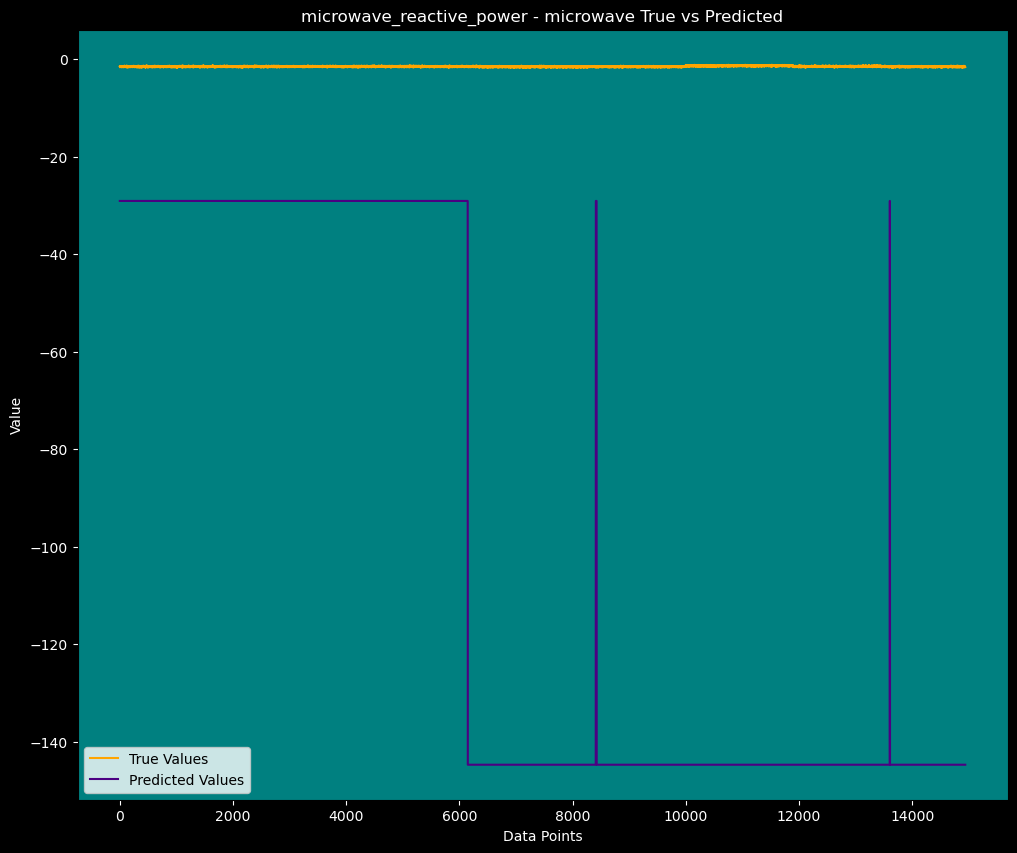

In [19]:
## MICROWAVE ##

X_microwave = microwave_data[total_features].values
Y_microwave = microwave_data[microwave_features].values

X_train_microwave, X_test_microwave, Y_train_microwave, Y_test_microwave = microwave_train[total_features].values, microwave_test[total_features].values, microwave_train[microwave_features].values, microwave_test[microwave_features].values

co_disaggregator_microwave = CO(num_states=2,num_cluster=2)
co_disaggregator_microwave.train(X_train_microwave)

disaggregated_data_microwave  = co_disaggregator_microwave.disaggregate(X_test_microwave)

for i, feature in enumerate(microwave_features):
    true_values = Y_test_microwave[:, i]
    pred_values = disaggregated_data_microwave[:, i]
    
    rmse = co_disaggregator_microwave.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_microwave.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_microwave.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_microwave.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_microwave.shape[1]):
    column_name = microwave_features[i]
    column_true = Y_test_microwave[:, i]
    column_pred = disaggregated_data_microwave[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - microwave True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for washing_machine_active_power:
RMSE: 558.6055538905107
MSE: 312040.16483732424
RMAE: 1.682476038381014
MAE: 470.2805882981008
R2: 0.35414916774670857

Metrics for washing_machine_reactive_power:
RMSE: 141.1008115256724
MSE: 19909.43901320333
RMAE: -59.30619841339818
MAE: 132.0337138657554
R2: -63.87549656462669



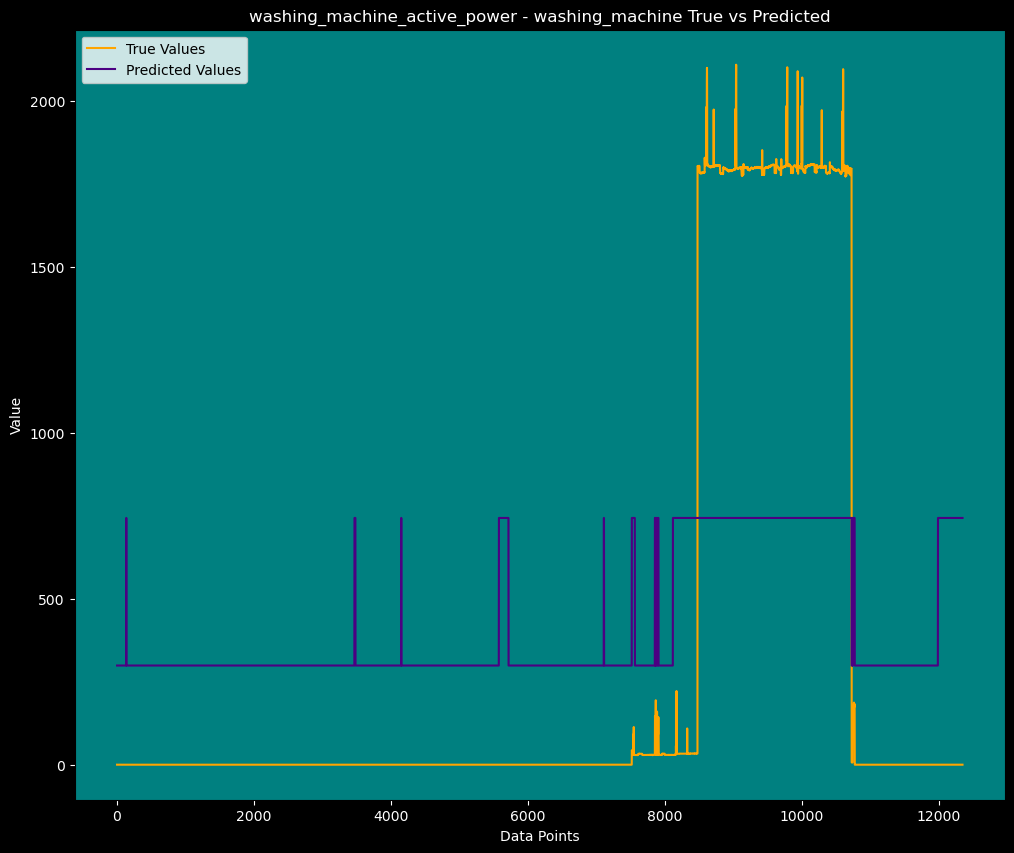

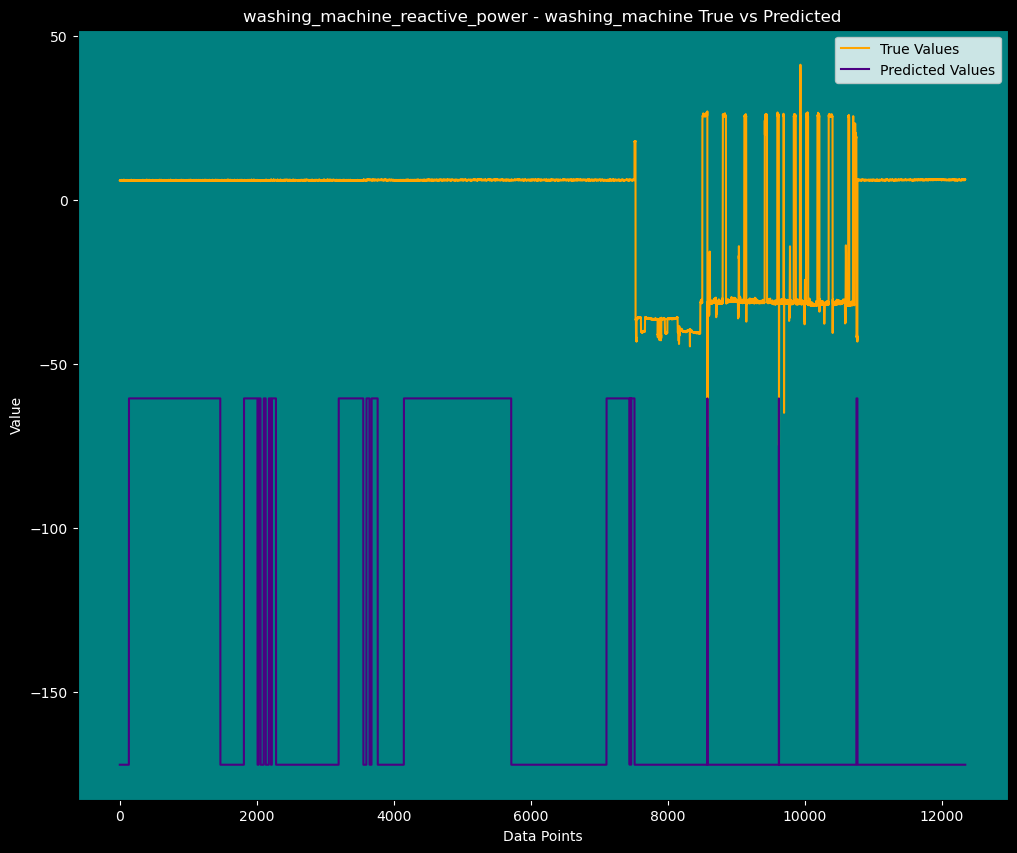

In [20]:
## WASHING MACHINE ##

X_washing_machine = washing_machine_data[total_features].values
Y_washing_machine = washing_machine_data[washing_machine_features].values

X_train_washing_machine, X_test_washing_machine, Y_train_washing_machine, Y_test_washing_machine = washing_machine_train[total_features].values, washing_machine_test[total_features].values, washing_machine_train[washing_machine_features].values, washing_machine_test[washing_machine_features].values

co_disaggregator_washing_machine = CO(num_states=2,num_cluster=2)
co_disaggregator_washing_machine.train(X_train_washing_machine)

disaggregated_data_washing_machine  = co_disaggregator_washing_machine.disaggregate(X_test_washing_machine)

for i, feature in enumerate(washing_machine_features):
    true_values = Y_test_washing_machine[:, i]
    pred_values = disaggregated_data_washing_machine[:, i]
    
    rmse = co_disaggregator_washing_machine.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_washing_machine.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_washing_machine.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_washing_machine.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_washing_machine.shape[1]):
    column_name = washing_machine_features[i]
    column_true = Y_test_washing_machine[:, i]
    column_pred = disaggregated_data_washing_machine[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - washing_machine True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for kimchi_fridge_active_power:
RMSE: 377.0596158662075
MSE: 142173.95391717192
RMAE: 46.843108959224416
MAE: 347.7735967547449
R2: -81.7037794006645

Metrics for kimchi_fridge_reactive_power:
RMSE: 124.52713759129587
MSE: 15507.007996681532
RMAE: -305.4749569061358
MAE: 105.12869138176367
R2: -37.10955036988131



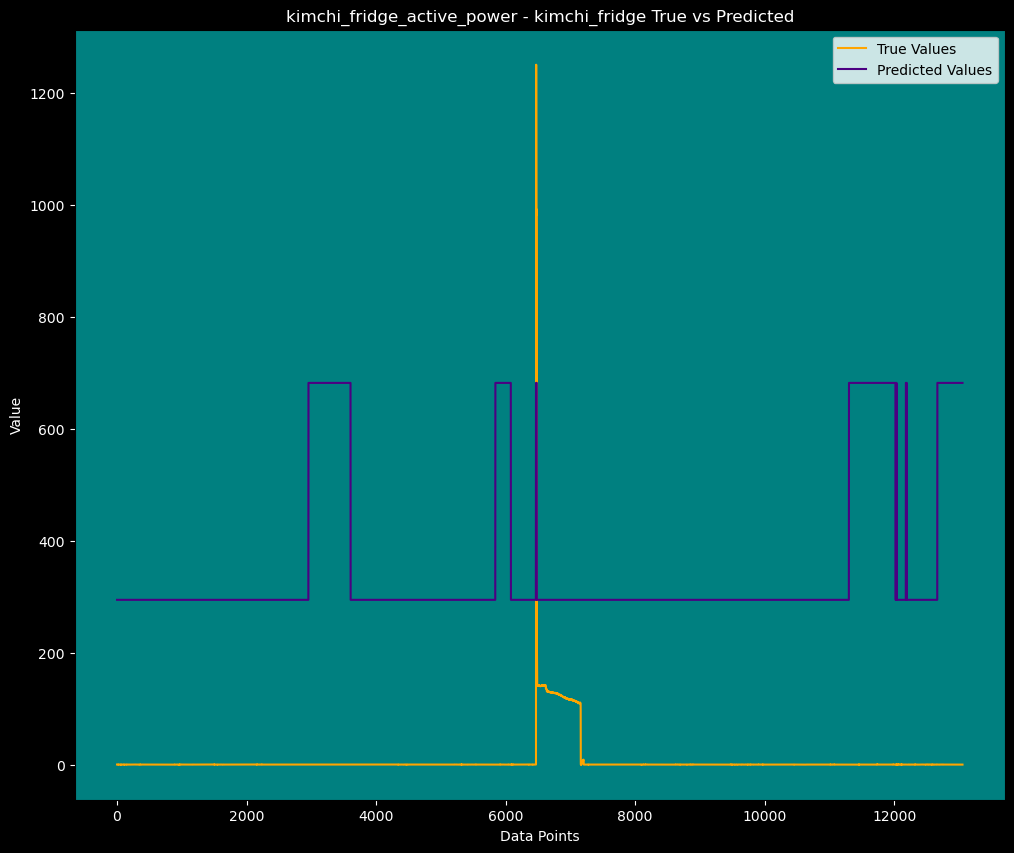

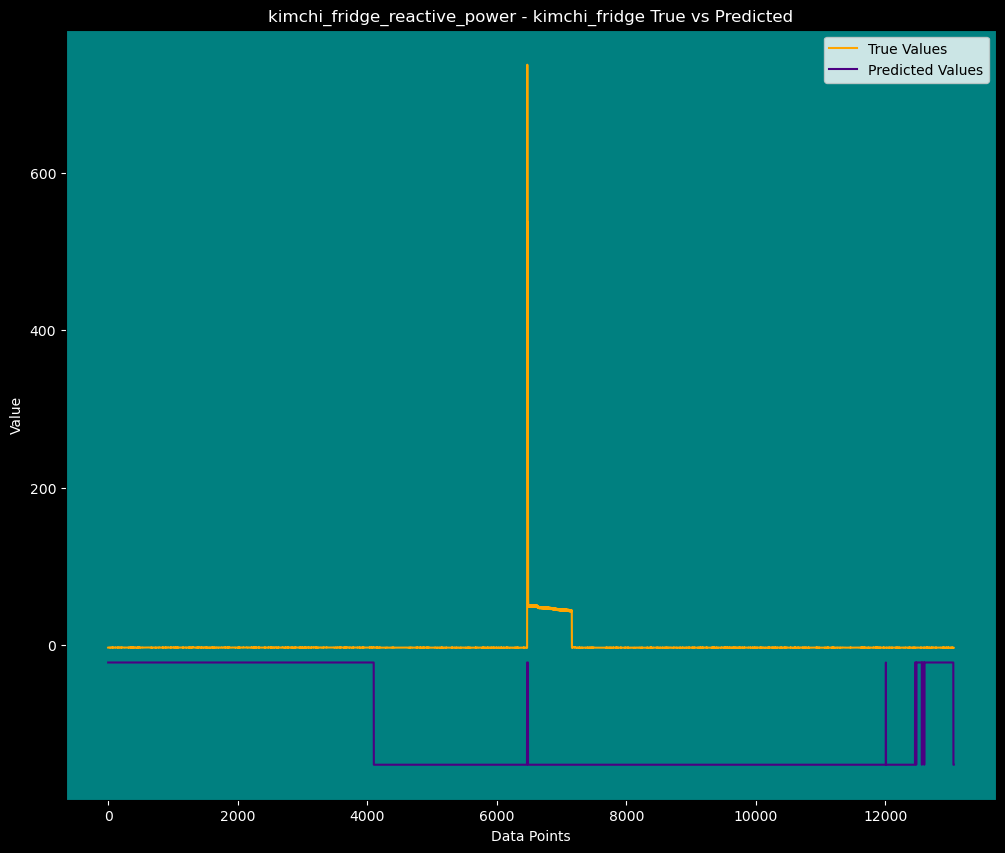

In [21]:
## KIMCHI FRIDGE ##


X_kimchi_fridge = kimchi_fridge_data[total_features].values
Y_kimchi_fridge = kimchi_fridge_data[kimchi_fridge_features].values

X_train_kimchi_fridge, X_test_kimchi_fridge, Y_train_kimchi_fridge, Y_test_kimchi_fridge = kimchi_fridge_train[total_features].values, kimchi_fridge_test[total_features].values, kimchi_fridge_train[kimchi_fridge_features].values, kimchi_fridge_test[kimchi_fridge_features].values

co_disaggregator_kimchi_fridge = CO(num_states=2,num_cluster=2)
co_disaggregator_kimchi_fridge.train(X_train_kimchi_fridge)

disaggregated_data_kimchi_fridge  = co_disaggregator_kimchi_fridge.disaggregate(X_test_kimchi_fridge)

for i, feature in enumerate(kimchi_fridge_features):
    true_values = Y_test_kimchi_fridge[:, i]
    pred_values = disaggregated_data_kimchi_fridge[:, i]
    
    rmse = co_disaggregator_kimchi_fridge.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_kimchi_fridge.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_kimchi_fridge.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_kimchi_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_kimchi_fridge.shape[1]):
    column_name = kimchi_fridge_features[i]
    column_true = Y_test_kimchi_fridge[:, i]
    column_pred = disaggregated_data_kimchi_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - kimchi_fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for tv_active_power:
RMSE: 375.44869098335226
MSE: 140961.71956111272
RMAE: 1899.3021495228554
MAE: 358.6286140966404
R2: -38451955.876986496

Metrics for tv_reactive_power:
RMSE: 84.89041599599425
MSE: 7206.382727972955
RMAE: 47.59193658647283
MAE: 67.72472668081225
R2: -1701941.062718629



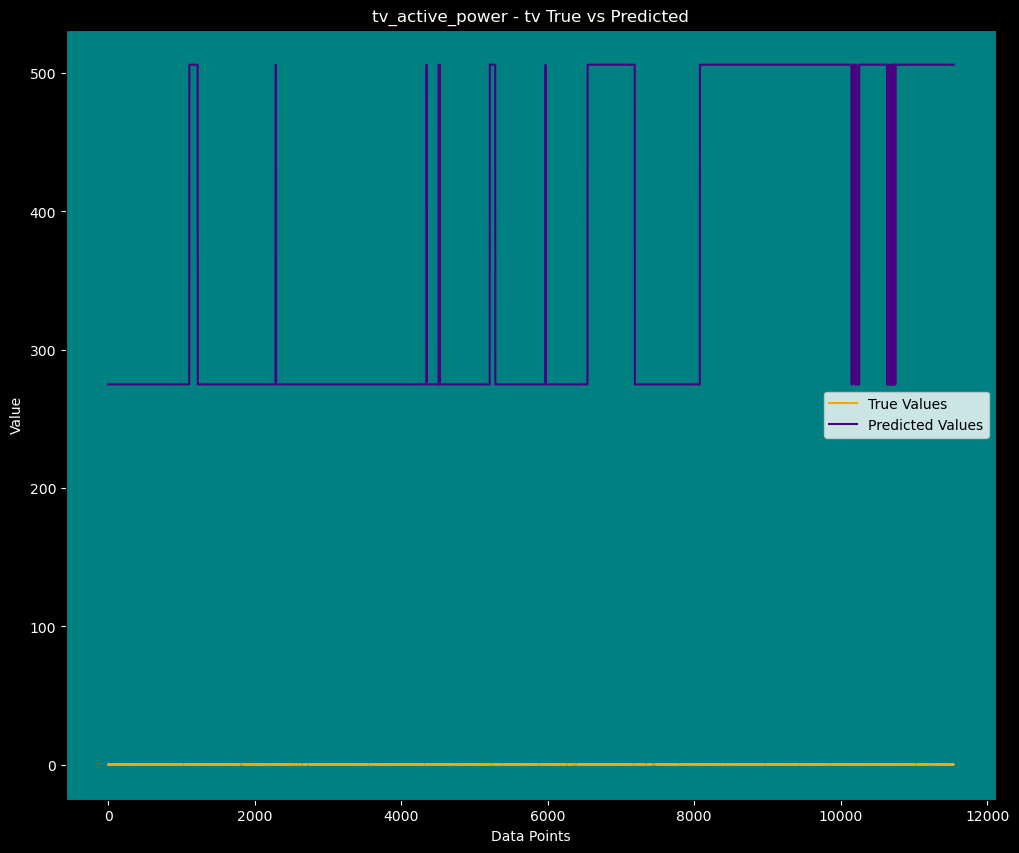

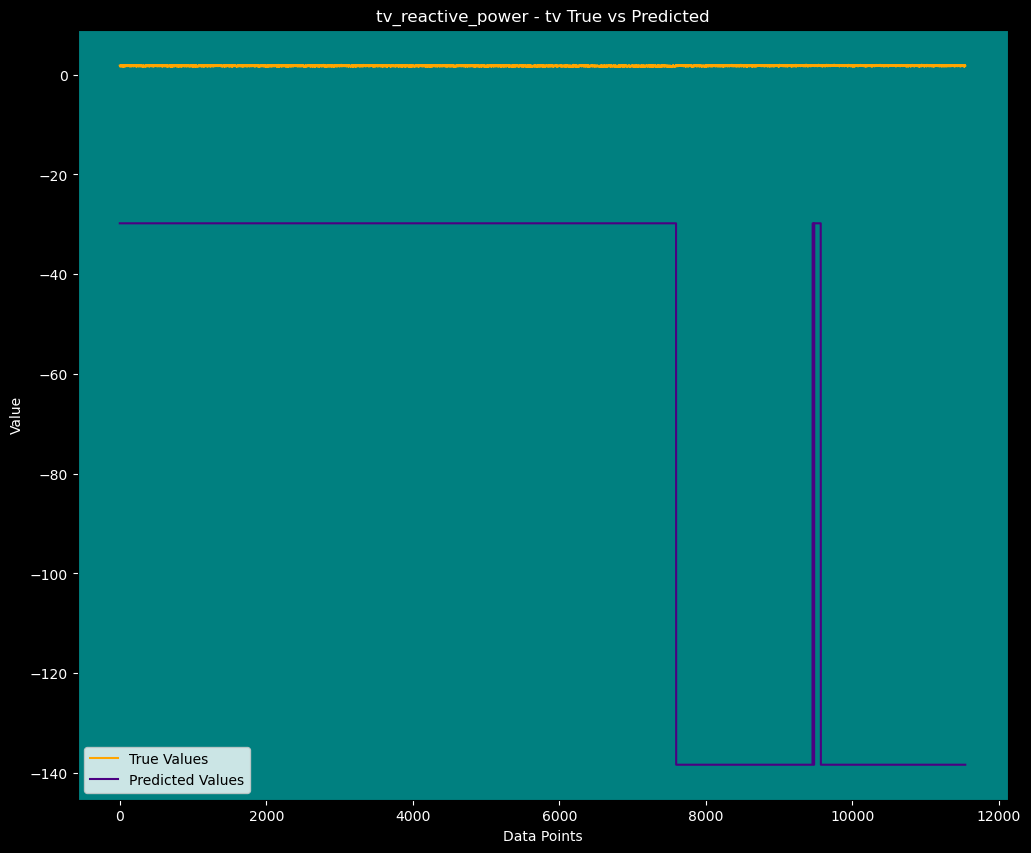

In [22]:
## tv ##

X_tv = tv_data[total_features].values
Y_tv = tv_data[tv_features].values

X_train_tv, X_test_tv, Y_train_tv, Y_test_tv = tv_train[total_features].values, tv_test[total_features].values, tv_train[tv_features].values, tv_test[tv_features].values

co_disaggregator_tv = CO(num_states=2,num_cluster=2)
co_disaggregator_tv.train(X_train_tv)

disaggregated_data_tv  = co_disaggregator_tv.disaggregate(X_test_tv)

for i, feature in enumerate(tv_features):
    true_values = Y_test_tv[:, i]
    pred_values = disaggregated_data_tv[:, i]
    
    rmse = co_disaggregator_tv.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_tv.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_tv.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_tv.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_tv.shape[1]):
    column_name = tv_features[i]
    column_true = Y_test_tv[:, i]
    column_pred = disaggregated_data_tv[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - tv True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for rice_cooker_active_power:
RMSE: 347.68800215664004
MSE: 120886.94684367573
RMAE: 1472.310021489545
MAE: 325.7412176049085
R2: -35452165.70645428

Metrics for rice_cooker_reactive_power:
RMSE: 116.41990714511523
MSE: 13553.594779677253
RMAE: -13503.156192393768
MAE: 100.7133921208743
R2: -3736538.273568944



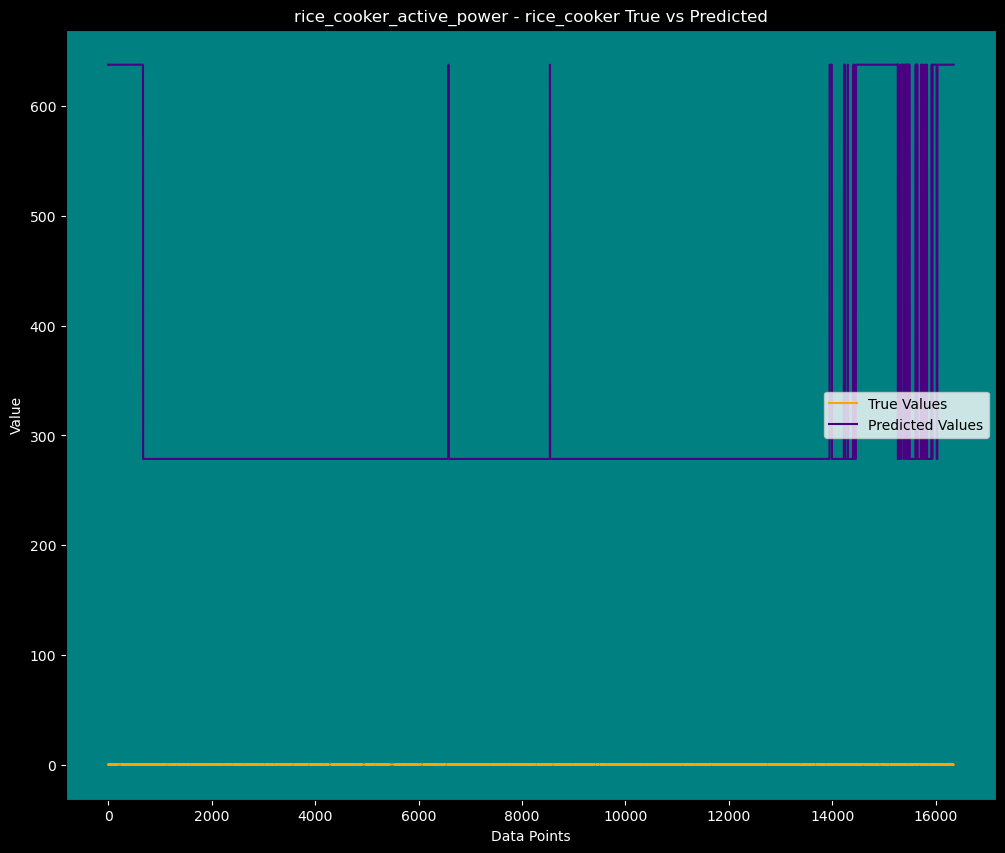

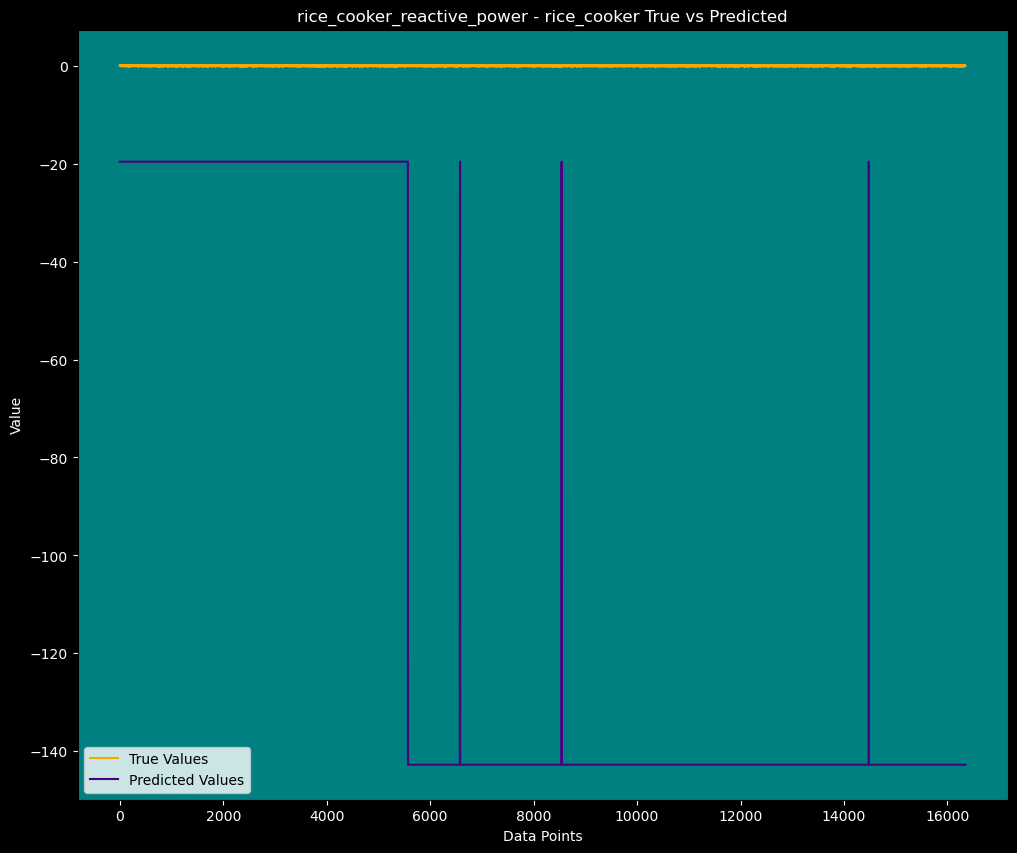

In [23]:
## rice cooker ## 

X_rice_cooker = rice_cooker_data[total_features].values
Y_rice_cooker = rice_cooker_data[rice_cooker_features].values

X_train_rice_cooker, X_test_rice_cooker, Y_train_rice_cooker, Y_test_rice_cooker = rice_cooker_train[total_features].values, rice_cooker_test[total_features].values, rice_cooker_train[rice_cooker_features].values, rice_cooker_test[rice_cooker_features].values

co_disaggregator_rice_cooker = CO(num_states=2,num_cluster=2)
co_disaggregator_rice_cooker.train(X_train_rice_cooker)

disaggregated_data_rice_cooker  = co_disaggregator_rice_cooker.disaggregate(X_test_rice_cooker)

for i, feature in enumerate(rice_cooker_features):
    true_values = Y_test_rice_cooker[:, i]
    pred_values = disaggregated_data_rice_cooker[:, i]
    
    rmse = co_disaggregator_rice_cooker.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_rice_cooker.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_rice_cooker.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_rice_cooker.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_rice_cooker.shape[1]):
    column_name = rice_cooker_features[i]
    column_true = Y_test_rice_cooker[:, i]
    column_pred = disaggregated_data_rice_cooker[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - rice_cooker True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for water_pur_active_power:
RMSE: 345.22694283716856
MSE: 119181.64206069765
RMAE: 6.905608194822808
MAE: 304.7448697581248
R2: -76.49849561065759

Metrics for water_pur_reactive_power:
RMSE: 139.7699004601855
MSE: 19535.625074650165
RMAE: 1.7813760167704673
MAE: 138.37170387778858
R2: -4.4677125562521365



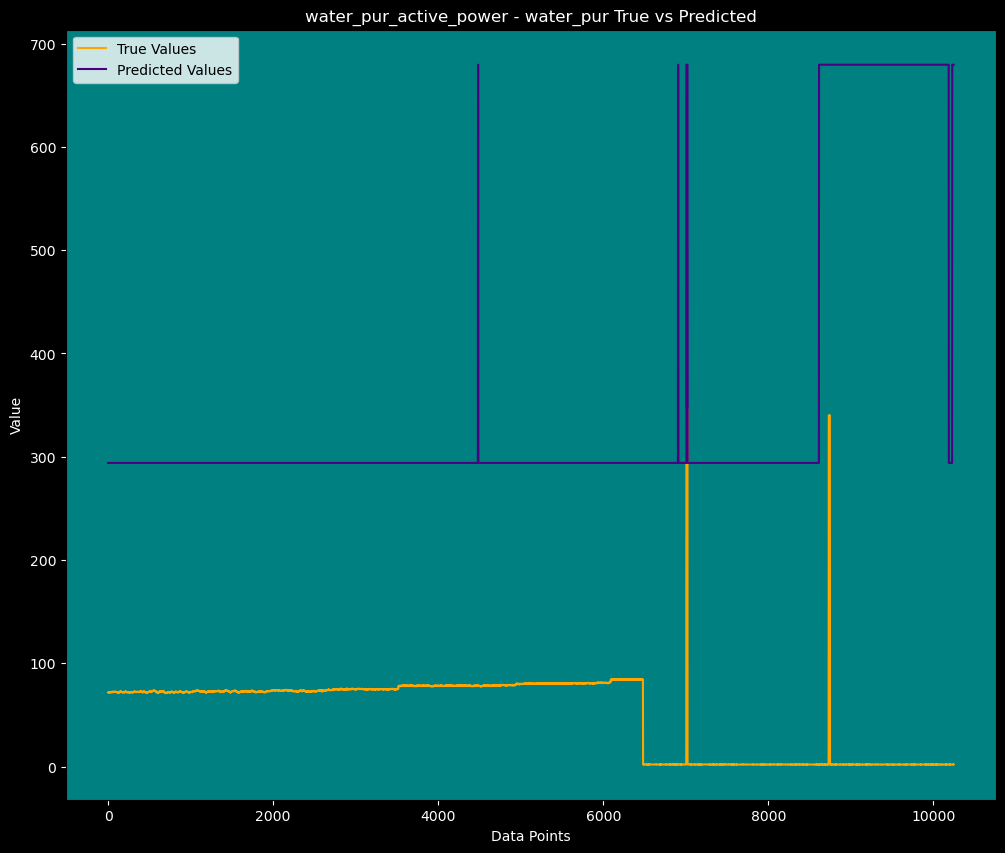

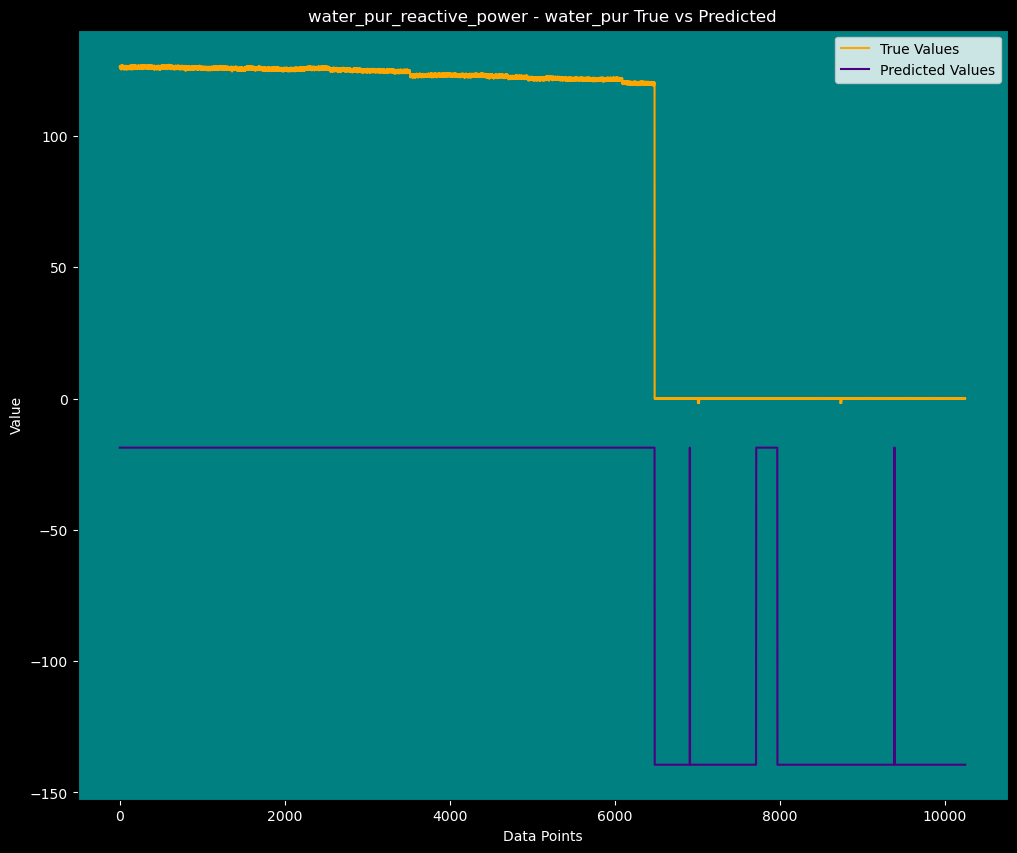

In [24]:
## water purifier ## 

X_water_pur = water_pur_data[total_features].values
Y_water_pur = water_pur_data[water_pur_features].values

X_train_water_pur, X_test_water_pur, Y_train_water_pur, Y_test_water_pur = water_pur_train[total_features].values, water_pur_test[total_features].values, water_pur_train[water_pur_features].values, water_pur_test[water_pur_features].values

co_disaggregator_water_pur = CO(num_states=2,num_cluster=2)
co_disaggregator_water_pur.train(X_train_water_pur)

disaggregated_data_water_pur  = co_disaggregator_water_pur.disaggregate(X_test_water_pur)

for i, feature in enumerate(water_pur_features):
    true_values = Y_test_water_pur[:, i]
    pred_values = disaggregated_data_water_pur[:, i]
    
    rmse = co_disaggregator_water_pur.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_water_pur.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_water_pur.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_water_pur.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_water_pur.shape[1]):
    column_name = water_pur_features[i]
    column_true = Y_test_water_pur[:, i]
    column_pred = disaggregated_data_water_pur[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - water_pur True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('teal')
    
    plt.show()